## Project 1

+ Date: 2022/9/13

### Students

+ Wenbo Liu, wbliu20@lzu.edu.cn
+ Xuda Han, hanxd20@lzu.edu.cn
+ Chengkai Lin, linchk20@lzu.edu.cn
+ Yifei Guo, guoyf20@lzu.edu.cn

---

Prerequisites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Requirement 1 - 探索性数据分析

Perform an exploratory analysis of the dataset. Remember that exploratory analyses do not need to be refined or clear. It is just a draft of several visualizations that help get familiar with the data.<br>
Hence, in this step you should have several visualizations that help getting an idea of the datasets and will serve as a starting point to the explanatory visualizations in this project. (Don’t forget the difference between exploratory and explanatory).<br>
Hint: Python notebooks are usually useful for exploratory analyses because you can combine python code, visualizations and markdown text. Use all of these elements.

#### 1.1 数据结构

我们先对文档中特殊的列（algorithm, no_datapoints, no_features, train_energy(J)）进行读取，查看数据结构。

In [2]:
df = pd.read_csv('results-2021-12-18.csv',usecols=['algorithm','no_datapoints','no_features','train_energy(J)'])
df

,algorithm,no_datapoints,no_features,train_energy(J)
0,AdaBoost,2730,8169,1.037993
1,Decision Tree,3900,2451,0.068482
2,SVM,3900,4084,0.530155
3,AdaBoost,3900,1633,0.243067
4,Bagging Classifier,3900,6535,0.699298
...,...,...,...,...
3595,Random Forest,3900,4901,1.501089
3596,Bagging Classifier,1559,8169,0.170978
3597,SVM,3900,5718,1.108957
3598,Random Forest,1559,8169,0.581876


直接查看数据让人难以发现其中的规律，因此我们对数据按不同的算法进行了分类。我们发现：对于不同的算法，'no_datapoints'和'no_features'有相同的值，而当'no_datapoints'和'no_features'都相同时，'train_energy(J)'又有许多不同的值。

In [3]:
algorithm = df.groupby('algorithm')
for name,rows in algorithm:
    print(rows)

     algorithm  no_datapoints  no_features  train_energy(J)
0     AdaBoost           2730         8169         1.037993
3     AdaBoost           3900         1633         0.243067
7     AdaBoost           3119         8169         0.581184
8     AdaBoost           3900         3268         0.407974
25    AdaBoost           1169         8169         0.250212
...        ...            ...          ...              ...
3556  AdaBoost           3900          817         0.292578
3558  AdaBoost           2340         8169         0.427181
3560  AdaBoost           3900          817         0.266558
3588  AdaBoost           1169         8169         0.155544
3599  AdaBoost           3900         8169         0.992407

[600 rows x 4 columns]
               algorithm  no_datapoints  no_features  train_energy(J)
4     Bagging Classifier           3900         6535         0.699298
9     Bagging Classifier            779         8169         0.092099
23    Bagging Classifier           3900       

#### 1.2 变量组合对照

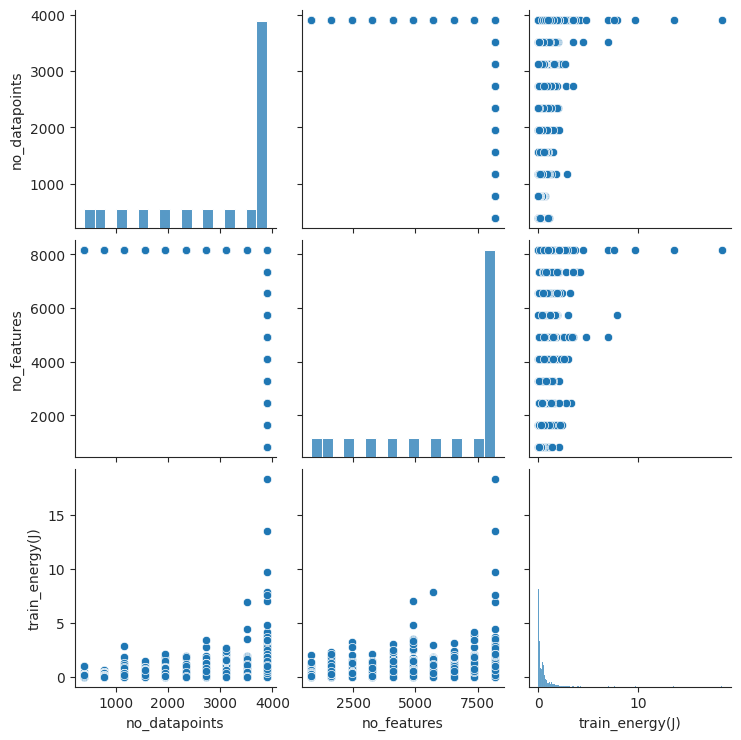

In [8]:
sns.pairplot(df)

#### 1.3 双因素分析

我们构造了一个可以同时展现'no_datapoints'和'no_features'对'train_energy(J)'的影响的图片。为了方便发现规律，我们对数据按照 'algorithm','no_datapoints'和'no_features'三列进行了分类，并对分类后的'train_energy(J)'求均值。在图中我们可以看出：似乎，当'no_datapoints'和'no_features'的数值越大，训练一个模型所消耗的能量就越多。

In [4]:
def bifactor(dataframe:pd.DataFrame,columns):
    grouped = dataframe.groupby(columns[-2::-1])  # 对 'algorithm','no_datapoints'和'no_features'进行聚类操作
    mean = grouped.mean()  # 对'train_energy(J)'求均值
    mean.reset_index(inplace=True)  # 重设索引，不再使用上述三列作为索引
    data = mean.groupby(columns[0])  # 按照算法进行聚类
    fig,counter = plt.figure(figsize=(15,10)),1  # 生成画布
    sns.set_style('ticks')  # 设置seaborn风格（去掉grid）
    for key,value in data:
        axes = fig.add_subplot(2,3,counter)  # 添加子图
        axes.set_title(key)  # 设置标题
        sns.scatterplot(data=value,x=columns[1],y=columns[2],hue=columns[3],ax=axes)  # 生成散点图
        sns.despine(top=True,right=True)  # 去掉上框线及右框线
        counter+=1
    plt.show()

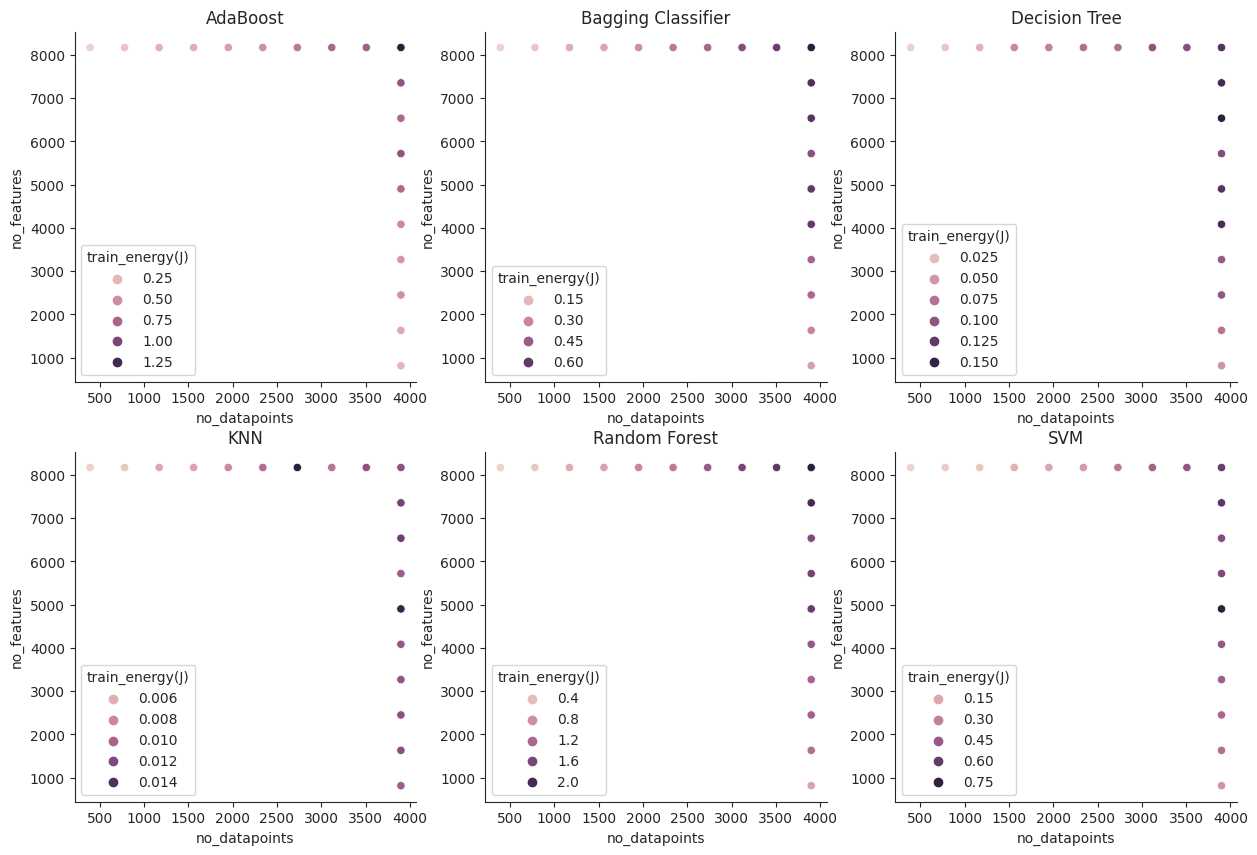

In [5]:
bifactor(df,['algorithm','no_datapoints','no_features','train_energy(J)'])

#### 1.4 单因素分析

从上述分析中我们得知'no_datapoints'，'no_features'和'train_energy(J)'之间似乎存在着某种线性关系，因此我们挑选了一个看起来相关性最为明显的算法('Random Forest')来进一步展现变量之间的关系。

In [6]:
def sgfactor(dataframe:pd.DataFrame,columns,alg):
    target = dataframe[dataframe['algorithm'] == alg]
    column1 = target.loc[:,[columns[1],columns[3]]]
    column2 = target.loc[:,[columns[2],columns[3]]]
    fig,counter = plt.figure(figsize=(10,5)),1
    sns.set_style('ticks')
    for item in [[column1,columns[1],columns[3]],[column2,columns[2],columns[3]]]:
        axes = fig.add_subplot(1,2,counter)
        sns.scatterplot(data=item[0],x=item[1],y=item[2],ax=axes)
        sns.despine(top=True,right=True)
        counter += 1
    fig.suptitle(alg)
    plt.show()

从图中可以看出，随着'no_datapoints'或'no_features'的增多，训练模型所需的能量有所增长。

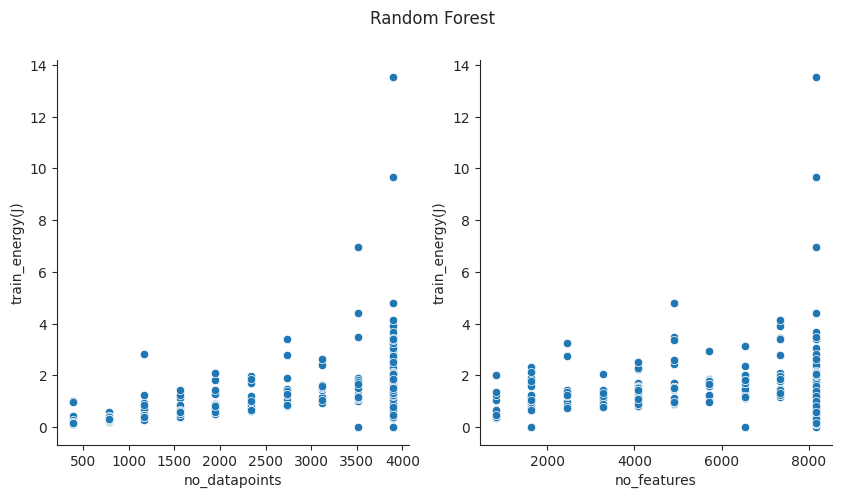

In [7]:
sgfactor(df,['algorithm','no_datapoints','no_features','train_energy(J)'],'Random Forest')

### Requirement 2

Create a visualization that shows, for the algorithm SVM, how no_features affects energy consumption (train_energy(J)). This visualization should 1) choose the most suitable chart type, 2) follow the visualization guidelines taught in the class, and 3) be as simple as possible. If necessary, there should be a visual element highlighting how no_features correlates with train_energy(J).<br>
Note that each experiment is repeated 30 times (as denoted by the feature iteration). You may want to use the average of these 30-sized samples and maybe its standard deviation.

### Requirement 3

Create a visualization that shows, for the algorithm SVM, how no_features affects energy consumption (train_energy(J)). This visualization should 1) choose the most suitable chart type, 2) follow the visualization guidelines taught in the class, and 3) be as simple as possible. If necessary, there should be a visual element highlighting how no_features correlates with train_energy(J).<br>
Note that each experiment is repeated 30 times (as denoted by the feature iteration). You may want to use the average of these 30-sized samples and maybe its standard deviation.

### Requirement 4

Create a single plot that is able to capture most of the insights of the visualization in requirement 3. You wont be able to capture all the insights, but the idea is the capture as much as possible while keeping the visualization simple and interesting.

### Requirement 5

Create a visualization that shows an interesting insight in the data that was not unveiled by the visualizations of requirements 2, 3, and 4.